In [15]:
from pprint import pprint
from IPython.display import HTML
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import matplotlib.pylab as pylab
from collections import Counter

pylab.style.use('ggplot')

data_file = "../Data/attacks.csv"
raw_data = sc.textFile(data_file)
header = raw_data.first() #extract header
raw_data = raw_data.filter(lambda row: row != header)

countries = {'CROATIA': 0, 'NORWAY': 0, 'FRANCE': 0, 'MARTINIQUE': 0, 'ICELAND': 0, 
            'JAVA': 1, 'Sierra Leone': 0, 'CYPRUS': 0, 'LIBERIA': 0, 'NEW BRITAIN': 1, 
            'URUGUAY': 1, 'NORTH ATLANTIC OCEAN ': 0, 'ADMIRALTY ISLANDS': 1, 
            'PAPUA NEW GUINEA': 1, 'DJIBOUTI': 0, 'TAIWAN': 1, 'EL SALVADOR': 0, 
            'ST. MAARTIN': 0, 'ASIA?': 0, 'NAMIBIA': 1, 'OCEAN': 1, 'CAPE VERDE': 0, 
            'MID ATLANTIC OCEAN': 0, 'MAURITIUS': 1, 'ANTIGUA': 0, 'FRENCH POLYNESIA': 1, 
            'JOHNSTON ISLAND': 0, 'SUDAN': 0, 'SOUTH KOREA': 0, 'TUVALU': 1, 
            'SOUTH ATLANTIC OCEAN': 1, 'UNITED ARAB EMIRATES (UAE)': 0, 'DOMINICAN REPUBLIC': 0, 
            ' PHILIPPINES': 0, 'MALAYSIA': 0, 'BRITISH VIRGIN ISLANDS': 0, 'CHINA': 0, 
            'ATLANTIC OCEAN': 0, 'ITALY': 0, 'VENEZUELA': 0, 'SOLOMON ISLANDS / VANUATU': 1, 
            'SOUTH CHINA SEA': 0, 'Between PORTUGAL & INDIA': 2, 'DIEGO GARCIA': 1, 
            'MEDITERRANEAN SEA?': 0, 'INDIAN OCEAN?': 1, 'INDIA': 0, 'SOUTH AFRICA': 1, 
            'St Helena': 1, 'WESTERN SAMOA': 1, 'TASMAN SEA': 1, 'HONG KONG': 0, 'TONGA': 1, 
            'YEMEN': 0, 'COLUMBIA': 0, 'NORTHERN MARIANA ISLANDS': 0, 'GUAM': 0, 'GUINEA': 0, 
            'CENTRAL PACIFIC': 2, 'GUATEMALA': 0, 'FIJI': 1, 'GULF OF ADEN': 0, 'JAPAN': 0, 
            'MID-PACIFC OCEAN': 0, 'ST. MARTIN': 1, 'USA': 0, 'CRETE': 0, 'BRAZIL': 1, 
            'TURKS & CAICOS': 0, 'SOUTHWEST PACIFIC OCEAN': 1, 'GREENLAND': 0, 
            'BAY OF BENGAL': 1, 'PACIFIC OCEAN': 0, 'LEBANON': 0, 'MALTA': 0, 'NIGERIA': 0, 
            'GREECE': 0, 'MEXICO': 0, 'BERMUDA': 0, 'UNITED KINGDOM': 0, 'SINGAPORE': 0, 
            'BRITISH ISLES': 0, 'TURKEY': 0, 'NEVIS': 1, 'AUSTRALIA': 1, 'ENGLAND': 0, 
            'SIERRA LEONE': 0, 'VANUATU': 1, 'NORTH SEA': 0, 'RUSSIA': 0, 'MICRONESIA': 0, 
            'PORTUGAL': 0, 'RED SEA': 0, 'MONTENEGRO': 0, 'IRAQ': 0, 'SWEDEN': 0, 
            'PERSIAN GULF': 0, 'NORTH ATLANTIC OCEAN': 0, 'Fiji': 1, 'SLOVENIA': 0, 
            'PHILIPPINES': 0, 'IRAN / IRAQ': 0, 'TUNISIA': 0, 'SAN DOMINGO': 1, 'AZORES': 0, 
            'GEORGIA': 0, 'BURMA': 0, 'NEW GUINEA': 1, 'SUDAN?': 0, 'NETHERLANDS ANTILLES': 0, 
            'ALGERIA': 0, 'NICARAGUA': 0, 'SEYCHELLES': 1, 'RED SEA?': 0, 'BRITISH NEW GUINEA': 1, 
            'THAILAND': 0, 'PALESTINIAN TERRITORIES': 0, 'FALKLAND ISLANDS': 1, 'IRELAND': 0, 
            'MONACO': 0, 'PARAGUAY': 1, 'SYRIA': 0, 'EGYPT ': 0, 'MADAGASCAR': 1, 
            'NORTH PACIFIC OCEAN': 0, 'EGYPT / ISRAEL': 0, 'COOK ISLANDS': 1, 
            'TRINIDAD & TOBAGO': 0, 'PACIFIC OCEAN ': 0, 'EQUATORIAL GUINEA / CAMEROON': 0, 
            'ISRAEL': 0, 'SAMOA': 1, 'ECUADOR': 1, 'CARIBBEAN SEA': 0, 'NEW CALEDONIA': 1, 
            'MARSHALL ISLANDS': 0, 'PANAMA': 0, 'UNITED ARAB EMIRATES': 0, 'ITALY / CROATIA': 0, 
            'NEW ZEALAND': 1, 'MALDIVE ISLANDS': 0, 'GHANA': 0, 'MOZAMBIQUE': 0, 'SRI LANKA': 0, 
            'SOLOMON ISLANDS': 1, 'Coast of AFRICA': 1, 'BARBADOS': 0, 'BANGLADESH': 0, 
            'CHILE': 1, 'CANADA': 0, 'HONDURAS': 0, 'PALAU': 0, 'AMERICAN SAMOA': 1, 
            'SAUDI ARABIA': 0, ' TONGA': 1, 'SPAIN': 0, 'ARGENTINA': 1, 'CURACAO': 0, 
            'ANDAMAN / NICOBAR ISLANDAS': 0, 'KENYA': 1, 'EGYPT': 0, 'THE BALKANS': 0, 
            'PUERTO RICO': 0, 'KIRIBATI': 0, 'OKINAWA': 0, 'REUNION': 1, 
            'BRITISH WEST INDIES': 0, 'NICARAGUA ': 0, 'FEDERATED STATES OF MICRONESIA': 0, 
            'IRAN': 0, 'CAYMAN ISLANDS': 0, 'SOMALIA': 0, 'INDONESIA': 1, 'KUWAIT': 0, 
            'Seychelles': 1, 'COSTA RICA': 0, 'INDIAN OCEAN': 1, 'CEYLON (SRI LANKA)': 0, 
            'YEMEN ': 0, 'HAITI': 0, 'SCOTLAND': 0, 'CUBA': 0, 'GUYANA': 0, 'LIBYA': 0, 
            'MEXICO ': 0, 'SENEGAL': 0, 'GRAND CAYMAN': 0, 'GABON': 1, 'GRENADA': 0, 
            'RED SEA / INDIAN OCEAN': 0, 'VIETNAM': 0, 'BAHAMAS': 0, 'BAHREIN': 0, 
            'NORTHERN ARABIAN SEA': 0, 'BELIZE': 0, 'MEDITERRANEAN SEA': 0, 'ANGOLA': 1, 
            'SOUTH PACIFIC OCEAN': 1, 'TANZANIA': 1, 'KOREA': 0, 'JAMAICA': 0, 'ARUBA': 0, 
            'MAYOTTE':1}

def add_hemisphere(line):
    elems = line.split(',')
    try:
        country = elems[4]
    except:
        country = ''
    hemi = countries.get(country)
    elems.append(hemi)
    return (elems)

raw_data = raw_data.map(add_hemisphere)
pprint(raw_data.count())

def get_season(month, day, hemi):
    m = month * 100
    if day == 0:
        d = 1
    else:
        d = day
    md = m + d
    if hemi == 0:
        if ((md >= 301) and (md <= 531)):
            s = 'spring'
        elif ((md > 531) and (md < 901)):
            s = 'summer'
        elif ((md >= 901) and (md <= 1130)):
            s = 'fall'
        elif ((md > 1130) and (md <= 229)):
            s = 'winter'
        else:
            s = 'unknown'
    else:
        if ((md >= 301) and (md <= 531)):
            s = 'fall'
        elif ((md > 531) and (md < 901)):
            s = 'winter'
        elif ((md >= 901) and (md <= 1130)):
            s = 'spring'
        elif ((md > 1130) and (md <= 229)):
            s = 'summer'
        else:
            s = 'unknown'
    return s

def add_season(line):
    date = line[0]
    year = date.split('.')[0]
    try:
        month = int(date.split('.')[1])
        day = int(date.split('.')[2])
    except:
        month = 0
        day = 0
    try:
        hemi = line[16]
    except:
        hemi = 0
    if year.startswith('00') or len(year) != 4 or month == 0:
        season = 'unknown'
    else:
        season = get_season(month,day,hemi)
    line.append(season)
    return line
season_raw_data = raw_data.map(add_season)
pprint(season_raw_data.count())


6003
6003


In [16]:
def get_by_season(line):
    try:
        tag = line[17]
    except:
        tag = 'unknown'
    return (tag, line)

by_season_data = season_raw_data.map(get_by_season)
count_by_season_data = by_season_data.countByKey()
pprint(count_by_season_data)
print(count_by_season_data.get('summer'))

defaultdict(<type 'int'>, {'unknown': 1823, 'fall': 1429, 'summer': 1303, 'winter': 383, 'spring': 1065})
1303


In [17]:
def get_by_year(line):
    try:
        tag = line[2]
    except:
        tag = '0'
    return (tag, line)

by_year_data = raw_data.map(get_by_year)
count_by_year = by_year_data.countByKey()

pprint(count_by_year)

defaultdict(<type 'int'>, {u'': 2, u'1788': 1, u'1818': 1, u'1785': 1, u'1787': 1, u'1869': 2, u'1868': 6, u'1832': 2, u'1948': 29, u'1949': 31, u'1836': 2, u'1837': 3, u'1834': 1, u'1835': 2, u'1942': 41, u'1943': 28, u'1940': 24, u'1941': 27, u'1946': 26, u'1947': 30, u'1944': 31, u'1945': 16, '0': 132, u'2015': 139, u'2014': 125, u'2016': 103, u'2011': 128, u'2010': 101, u'2013': 122, u'2012': 117, u'1918': 5, u'1791': 1, u'1955': 43, u'1954': 42, u'1957': 41, u'1956': 51, u'1951': 31, u'1950': 43, u'1953': 36, u'1952': 29, u'1555': 1, u'1959': 93, u'1958': 54, u'1554': 1, u'1700': 3, u'1703': 1, u'1829': 2, u'1828': 2, u'1825': 2, u'1827': 4, u'1826': 3, u'52': 1, u'1870': 8, u'1811': 1, u'1871': 8, u'1920': 15, u'1921': 11, u'1922': 22, u'1923': 21, u'1924': 19, u'1925': 14, u'1926': 21, u'1927': 19, u'1928': 26, u'1929': 37, u'1822': 1, u'1858': 4, u'1859': 1, u'1850': 1, u'1851': 3, u'1852': 10, u'1853': 7, u'1854': 1, u'1855': 7, u'1856': 4, u'1878': 12, u'1879': 8, u'1738': 1,

In [18]:
def fix_country_name(country):
    if country == 'INDIAN OCEAN':
        country = 'INDIA'
    elif country == 'REUNION':
        country = 'MADAGASCAR'
    elif country == 'FRENCH POLYNESIA':
        country = 'SAMOA'
    elif country == 'NEW BRITAIN':
        country = 'PAPUA NEW GUINEA'
    elif country == 'NEW GUINEA':
        country = 'PAPUA NEW GUINEA'
    elif country == 'UNITED ARAB EMIRATES (UAE)':
        country = 'UNITED ARAB EMIRATES'
    elif country == 'EGYPT ':
        country = 'EGYPT'
    elif country == 'SCOTLAND':
        country = 'UNITED KINGDOM'
    elif country == 'OKINAWA':
        country = 'JAPAN'
    elif country == 'AZORES':
        country = 'PORTUGAL'
    elif country == 'GUAM':
        country = 'United States'
    elif country == 'USA':
        country = 'United States'
    elif country == 'AMERICAN SAMOA':
        country = 'SAMOA'
    elif country == 'TRINIDAD & TOBAGO':
        country = 'TRINIDAD AND TOBAGO'
    return country.lower()

def get_by_country(line):
    try:
        tag = line[4]
    except:
        tag = 'unknown'
    tag = fix_country_name(tag)
    return (tag, line)

by_country_data = raw_data.map(get_by_country)
count_by_country = by_country_data.countByKey()

print(count_by_country)

defaultdict(<type 'int'>, {u'': 43, u'british new guinea': 1, u'pacific ocean': 17, u'cook islands': 1, u'cayman islands': 2, u'senegal': 11, u'crete': 2, u'japan': 38, u'taiwan': 9, u'cyprus': 1, u'barbados': 5, u'british west indies': 1, u'micronesia': 3, 'united kingdom': 18, u'egypt': 38, u'aruba': 1, u'puerto rico': 1, u'argentina': 1, u'norway': 2, u'sierra leone': 9, u'england': 19, u'ghana': 1, u'gulf of aden': 1, u'st. maartin': 1, u'australia': 1279, u'asia?': 1, u'cuba': 42, u'persian gulf': 4, u'st. martin': 1, u'tasman sea': 1, u'solomon islands / vanuatu': 1, u'haiti': 3, u'liberia': 3, u'coast of africa': 1, u'philippines': 59, u'red sea?': 1, u'djibouti': 1, u'red sea': 1, u'namibia': 2, u'sri lanka': 13, u'jamaica': 23, u'greenland': 1, 'samoa': 32, u'st helena': 1, u'lebanon': 3, u'malaysia': 4, u'korea': 1, u'mozambique': 44, u'greece': 25, u'nicaragua': 6, u'brazil': 102, u'palau': 5, u'curacao': 1, u'sudan': 4, u'guinea': 3, u'panama': 32, u'bahrein': 1, u'mediterr

In [19]:
def clean_year_column(line):
    try:
        tag = line[2]
        if tag == '':
            line[2] = 0
    except:
        line.append('0')
    return line

def count_country_by_year(raw_data, year):
    data_by_year = raw_data.filter(lambda x: int(x[2]) == year)
    by_country_data = data_by_year.map(get_by_country)
    count_by_country = by_country_data.countByKey()
    return ({year:count_by_country})

count_country_by_year_data = {}
new_raw_data = raw_data.map(clean_year_column)
for i in range(1850,2017):
    count_country_by_year_data.update(count_country_by_year(new_raw_data, i))

In [20]:
def get_by_activity(line):
    try:
        activity = line[7]
    except:
        activity = 'unknown'
    return (activity, line)

by_activity_data = raw_data.map(get_by_activity)
count_by_activity = by_activity_data.countByKey()


In [22]:
def clean_fatal_column(line):
    try:
        tag = line[12]
    except:
        line.append('N')
        line.append('N')
        line.append('N')
        line.append('N')
        line.append('N')
        line.append('N')
        line.append('N')
        line.append('N')
        line.append('N')
        line.append('N')
        line.append('N')
        line.append('N')
    return line

def count_fatal_by_country(raw_data):
    new_raw_data = raw_data.map(clean_fatal_column)
    data_fatal = new_raw_data.filter(lambda x: x[12] == 'Y')
    by_country_data_fatal = data_fatal.map(get_by_country)
    count_fatal_by_country = by_country_data_fatal.countByKey()
    return count_fatal_by_country

count_fatal_by_country_dict = count_fatal_by_country(raw_data)
    
pprint(count_fatal_by_country_dict)

defaultdict(<type 'int'>, {u'': 22, u'pacific ocean': 8, u'south pacific ocean': 2, u'senegal': 4, u'crete': 1, 'japan': 18, u'taiwan': 3, u'cyprus': 1, u'barbados': 3, u'united kingdom': 2, u'tunisia': 1, u'aruba': 1, u'cook islands': 1, u'sierra leone': 5, u'ghana': 1, u'gulf of aden': 1, u'australia': 341, u'cuba': 24, u'persian gulf': 1, u'guatemala': 1, u'solomon islands / vanuatu': 1, u'haiti': 1, u'liberia': 3, u'coast of africa': 1, u'philippines': 37, u'djibouti': 1, u'namibia': 1, u'sri lanka': 2, u'jamaica': 13, u'greenland': 1, u'england': 3, u'st helena': 1, u'lebanon': 2, u'malaysia': 1, u'mozambique': 20, u'greece': 15, u'nicaragua': 5, u'brazil': 40, u'sudan': 1, u'guinea': 3, u'panama': 19, u'bahrein': 1, u'mediterranean sea': 1, u'somalia': 5, u'croatia': 18, u'south atlantic ocean': 4, u'venezuela': 5, u'southwest pacific ocean': 1, u'korea': 1, u'iran': 13, u'saudi arabia': 1, u'mediterranean sea?': 1, 'trinidad and tobago': 1, u'china': 3, u'thailand': 3, u'belize'

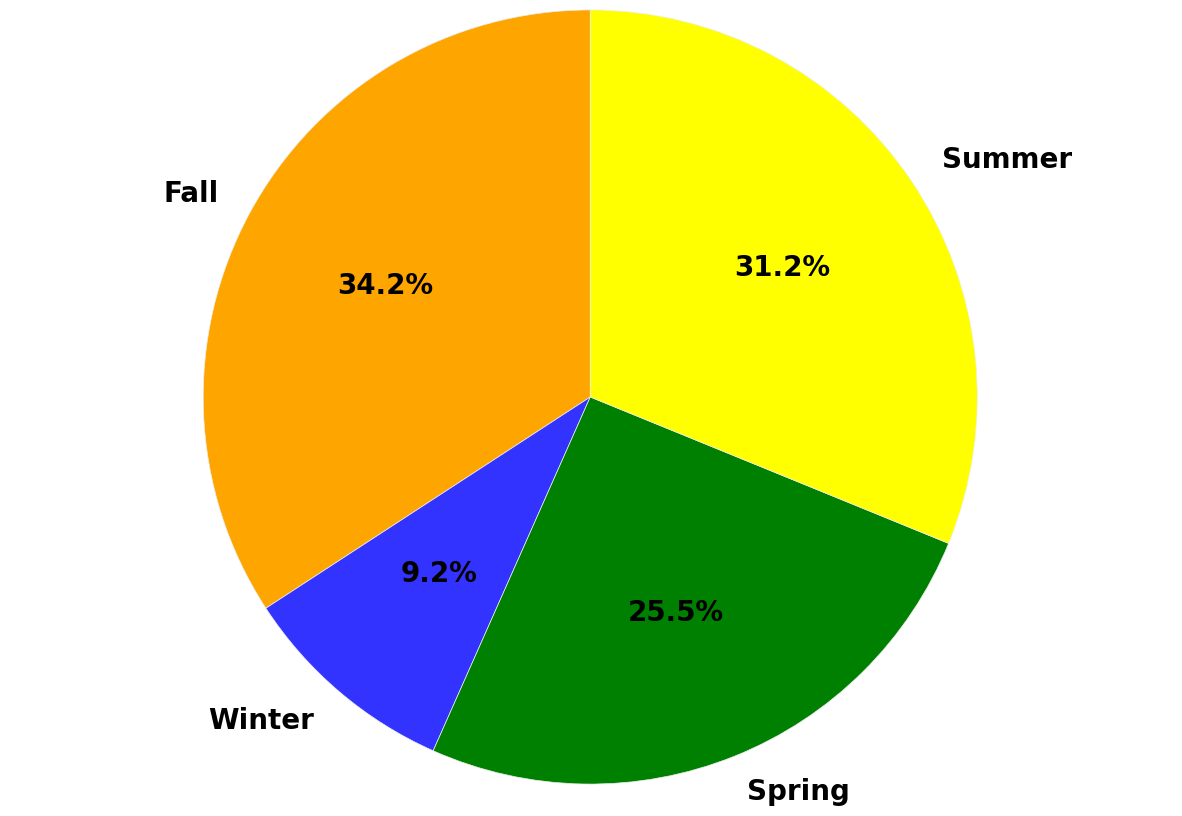

In [24]:
%matplotlib inline

font = {
        'weight' : 'bold',
        'size'   : 20 
}

plt.rc('font', **font)
f, ax = plt.subplots(figsize=(15, 10))


labels = ['Fall', 'Winter', 'Spring' ,'Summer']
colors = ['orange', '#3333ff', 'green','yellow']
attacks_by_season = (count_by_season_data.get('fall'),count_by_season_data.get('winter'),count_by_season_data.get('spring'),
                     count_by_season_data.get('summer'))



plt.pie(attacks_by_season, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
 
axis = plt.axis('equal')
plt.show()

raw_data = "att.csv"
All = pd.read_csv(raw_data, encoding = 'ISO-8859-1')
Chat conversation end


font = {
        'weight' : 'bold',
        'size'   : 20 
}

plt.rc('font', **font)

popular_activities = Counter(All['Activity'].dropna().tolist()).most_common(20)
activities = [actv_list[0] for actv_list in popular_activities]
counts = [actv_list[1] for actv_list in popular_activities]

fig, ax = plt.subplots(figsize=(20, 11))

sns.barplot(x=activities, y=counts, color='blue', ax=ax)
ax.set(ylabel="Frequency", xlabel="Activity")

ticksx = plt.setp(ax.get_xticklabels(), rotation=60, fontsize=17)
ticksy = plt.setp(ax.get_yticklabels(), rotation=60, fontsize=17)
plt.savefig("activities.png")

In [25]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

In [ ]:
#ALL ATTACKS PER COUNTRY SINCE BEGINNING OF DATA
reader = shpreader.Reader(shpfilename)
countries = reader.records()
plt.figure(figsize=(30,18))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.25)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

ax.set_extent([-150, 60, -25, 60])


for c in countries:
    temp = count_by_country.get(c.attributes['name_long'].lower(), False)
    # Loop thingy
    if temp:
        # 1 - 5
        if 0 <= temp and temp < 6:
            ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#fff600'))
        # 6 - 20
        elif 6 <= temp and temp < 21:
            ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#ffc302'))
        # 21 - 100
        elif 21 <= temp and temp < 101:
            ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#ff8f00'))
        # 101 - 500
        elif 101 <= temp and temp < 501:
            ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#ff5b00'))
        # > 500
        elif 501 <= temp:
            ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#ff0505'))
    else:
        ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#aaaaaa'))

plt.title("Total of shark attacks globally")
plt.show()

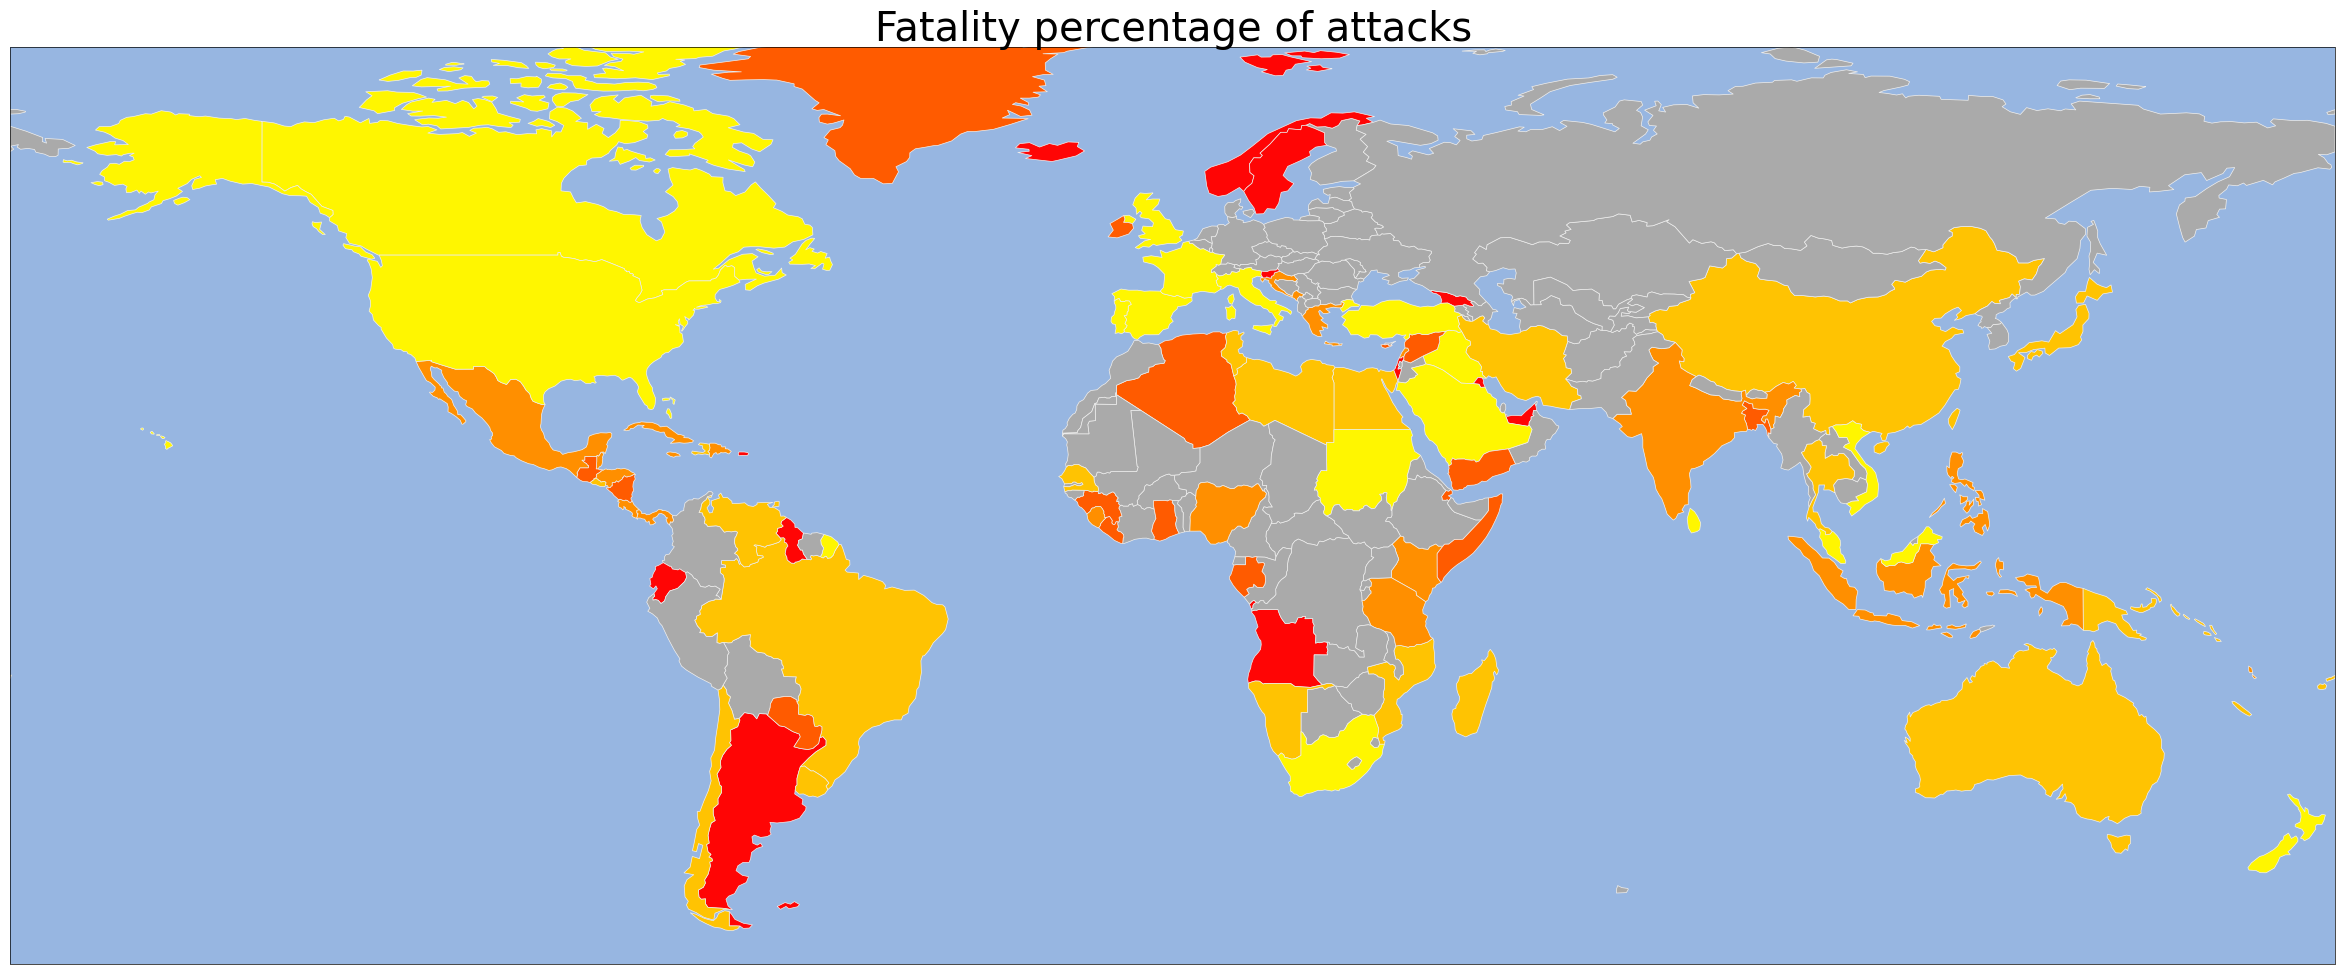

In [27]:
#FATALITY PERCENTAGE   
reader = shpreader.Reader(shpfilename)
countries = reader.records()

plt.figure(figsize=(30,18))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.25)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

ax.set_extent([-150, 60, -25, 60])

for c in countries:
    attacks = count_by_country.get(c.attributes['name_long'].lower(), False)
    if attacks:
        fatals = count_fatal_by_country_dict.get(c.attributes['name_long'].lower(), False)
        
        if fatals:
            per_fatals = (float(fatals) / float(attacks)) * 100
            
            if 0 < per_fatals and per_fatals < 26:
                ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#fff600'))
            elif 26 <= per_fatals and per_fatals < 51:
                ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#ffc302'))                
            elif 51 <= per_fatals and per_fatals < 76:
                ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#ff8f00'))  
            elif 76 <= per_fatals:
                ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#ff5b00')) 
        else:
            ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#ff0505'))
    else:
        ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#aaaaaa'))

                          
plt.title("Fatality percentage of attacks")
plt.show()

In [ ]:
form = """
<div style='background-color:gainsboro; border:solid black; width:300px; padding:20px;'>
Van :<output for="from" id="from_output">1851</output>
<input id='from' type='range' min='1851' max='2016' step='5' value='0' onchange='set_vars()'/>
Tot : <output for="until" id="until_output">2016</output>
<input id='until' type='range' min='1851' max='2016' step='5' value='0' onchange='set_vars()'/>
</div>
"""
javascript = """
<script type="text/Javascript">
    function set_vars(){
        var var_name1 = 'inp_from';
        var var_value1 = document.getElementById('from').value;
        document.getElementById('from_output').value = var_value1;
        var var_name2 = 'inp_until';
        var var_value2 = document.getElementById('until').value;
        document.getElementById('until_output').value = var_value2;
        var command1 = var_name1 + " = '" + var_value1 + "'";
        var command2 = var_name2 + " = '" + var_value2 + "'"; 
        var kernel = IPython.notebook.kernel;
        kernel.execute(command1);
        kernel.execute(command2);
        cell = IPython.notebook.get_cell(6);
        cell.execute();
        cell.focus_cell();
    }
</script>
"""

HTML(form + javascript)

In [ ]:
from collections import Counter

period = []
for i in range(int(inp_from),int(inp_until)+1):
    period.append(count_country_by_year_data.get(i))
inp = [dict(x) for x in period]
count = Counter()
for y in inp:
    count += Counter(y)
print(count)